In [43]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,

    "font.family": "serif",
    "font.size": 16,

    # Set some default sizes, so we don't need to include them in each call
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    # "errorbar.capsize": 3,

    # Set savefig to use bbox_inches="tight" by default
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,

    # Higher DPI for sharper inline images
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

In [44]:
file_name = 'nH1.0e+00_lam1.14um_theobs0.35_Ldnu_xcentr.txt'

with open(file_name, 'r') as file:
    first_line = file.readline()
    first_row_data = first_line.split()[3:]

# Assign the three floats to variables
tobsmin, tobsmax, Ntobs = map(float, first_row_data)

# Load the data from the text file
data = np.genfromtxt(file_name, dtype=float, skip_header=2, filling_values=np.nan)

# Print the loaded data
print(data)
print(tobsmin, tobsmax, Ntobs)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.30006133e+18 1.23095054e+19 4.97838209e+19
  1.45480915e+20 3.97184674e+20 9.01084612e+20 1.72179575e+21
  2.91424208e+21 4.61486730e+21 6.68974893e+21 9.10433809e+21
  1.18496008e+22 1.51582430e+22 1.86040222e+22 2.20975725e+22
  2.57124057e+22 2.99461347e+22 3.40861257e+22 3.81725479e+22
  4.25206156e+22 4.77740620e+22 5.26422144e+22 5.72531285e+22
  6.23162295e+22 6.77732605e+22 7.22063657e+22 7.54524956e+22
  7.83484414e+22 7.99686647e+22 7.97323269e+22 7.79530672e+22
  7.57853367e+22 7.23013435e+22 6.74687440e+22 6.22946317e+22
  5.77249004e+22 5.28655266e+22 4.75097324e+22 4.29095207e+22
  3.86925296e+22 3.44060560e+22 2.99492181e+22 2.63168457e+22
  2.2986

In [45]:
Ldnu_cgs = data[0]
xcentr_pc = data[1]

In [46]:
log_tobsmin = np.log10(tobsmin)
log_tobsmax = np.log10(tobsmax)

# Create the logarithmic space with normalized values
tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)

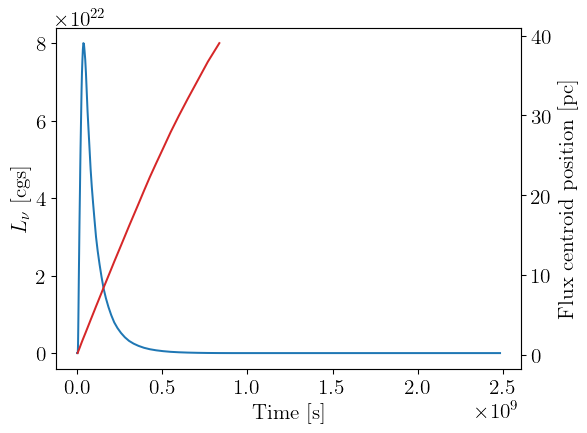

In [54]:
# Initialize the plot
fig, ax1 = plt.subplots()

# Plot Ldnu_cgs against tobs on the primary y-axis
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('$L_{\\nu}$ [cgs]')
ax1.plot(tobs, Ldnu_cgs, color='tab:blue')
ax1.tick_params(axis='y')

# Create a secondary y-axis to plot xcentr_pc
ax2 = ax1.twinx()
ax2.set_ylabel('Flux centroid position [pc]')
ax2.plot(tobs, xcentr_pc, color='tab:red')
ax2.tick_params(axis='y')

# Add a title and show the plot
fig.tight_layout()  # Ensure the plot layout is tidy
plt.show()